<a href="https://colab.research.google.com/github/P-Tharun-cse/SkillCraft-Intern/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00
mean,53.72,0.76,3.23,132.15,210.36,0.21,0.70,139.73,0.39,0.92,1.62,0.53
std,9.36,0.42,0.94,18.37,101.42,0.41,0.87,25.52,0.49,1.09,0.61,0.50
min,28.00,0.00,1.00,0.00,0.00,0.00,0.00,60.00,0.00,-2.60,0.00,0.00
25%,47.00,1.00,3.00,120.00,188.00,0.00,0.00,121.00,0.00,0.00,1.00,0.00
50%,54.00,1.00,4.00,130.00,229.00,0.00,0.00,140.50,0.00,0.60,2.00,1.00
75%,60.00,1.00,4.00,140.00,269.75,0.00,2.00,160.00,1.00,1.60,2.00,1.00
max,77.00,1.00,4.00,200.00,603.00,1.00,2.00,202.00,1.00,6.20,3.00,1.00


<Axes: xlabel='target'>

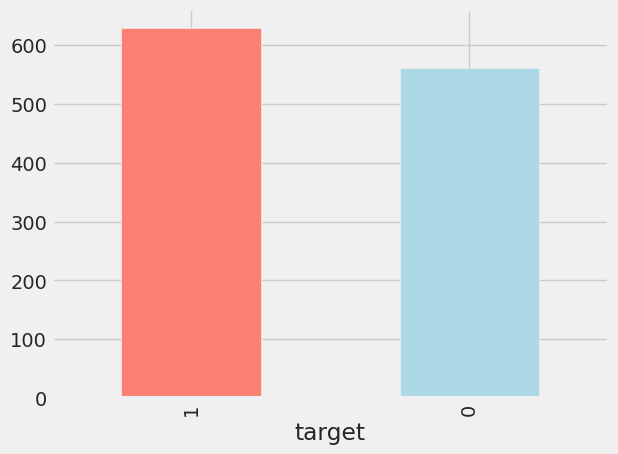

In [4]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [5]:

# Checking for messing values
df.isna().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [6]:

categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
sex : [1 0]
chest pain type : [2 3 4 1]
resting bp s : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251

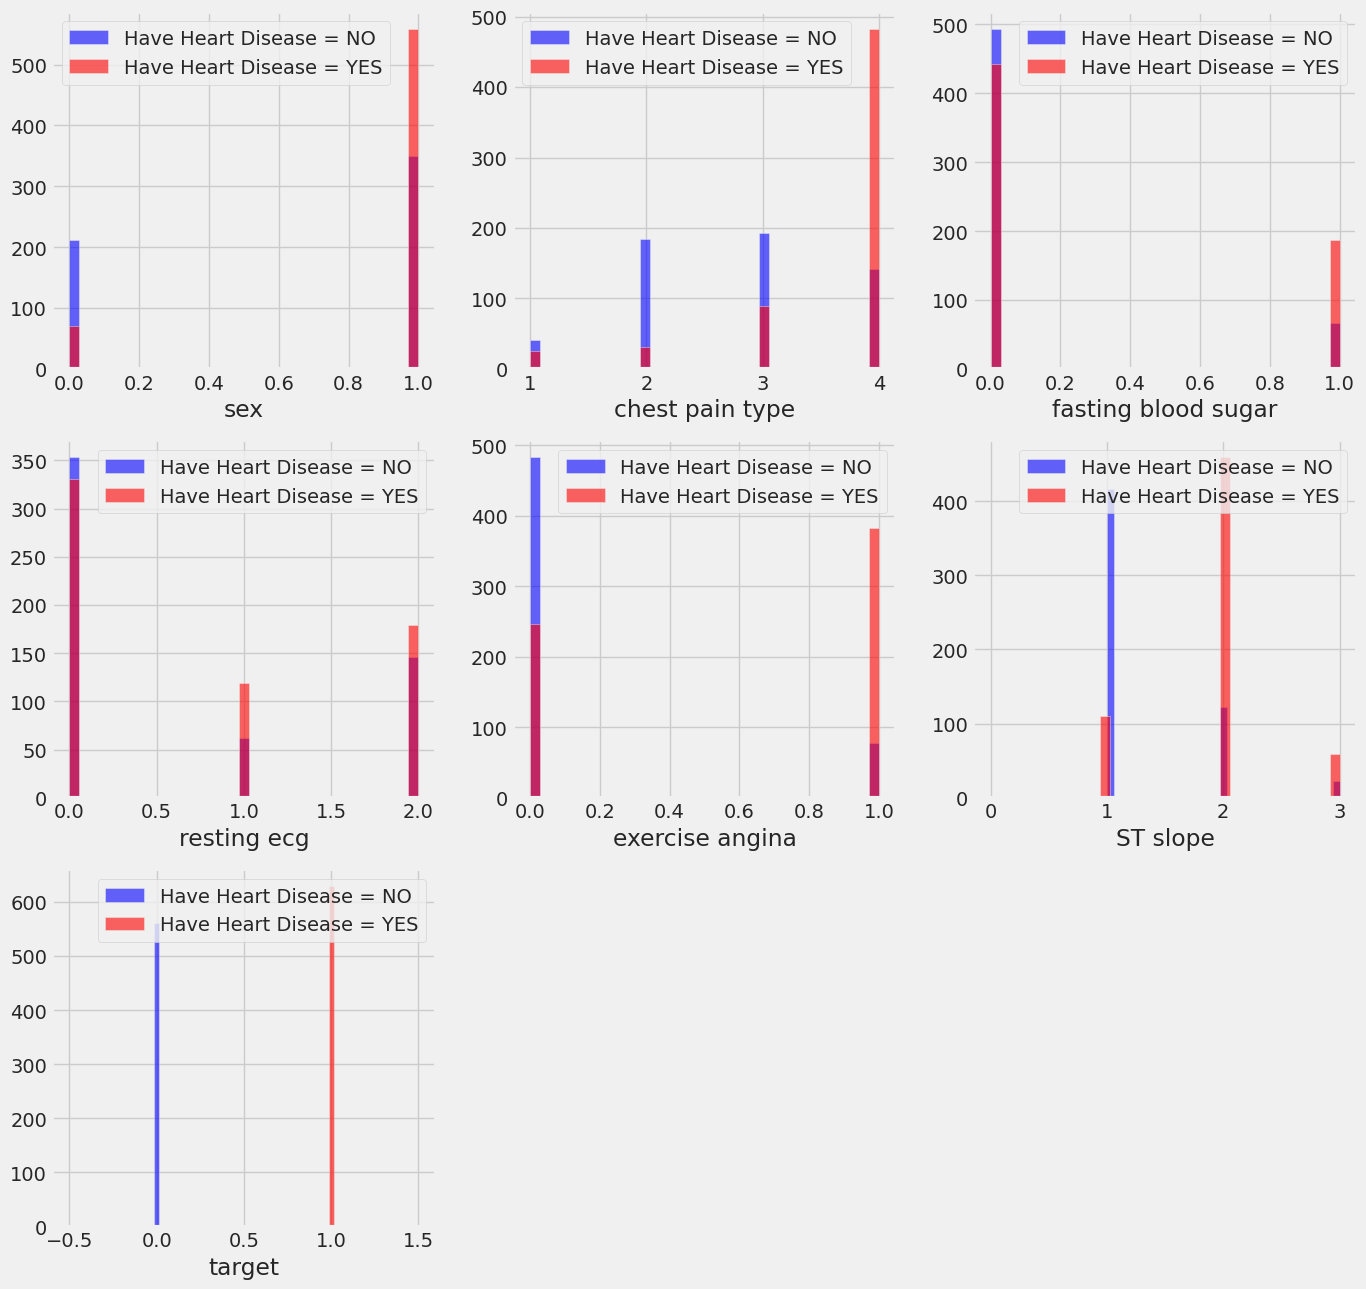

In [7]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

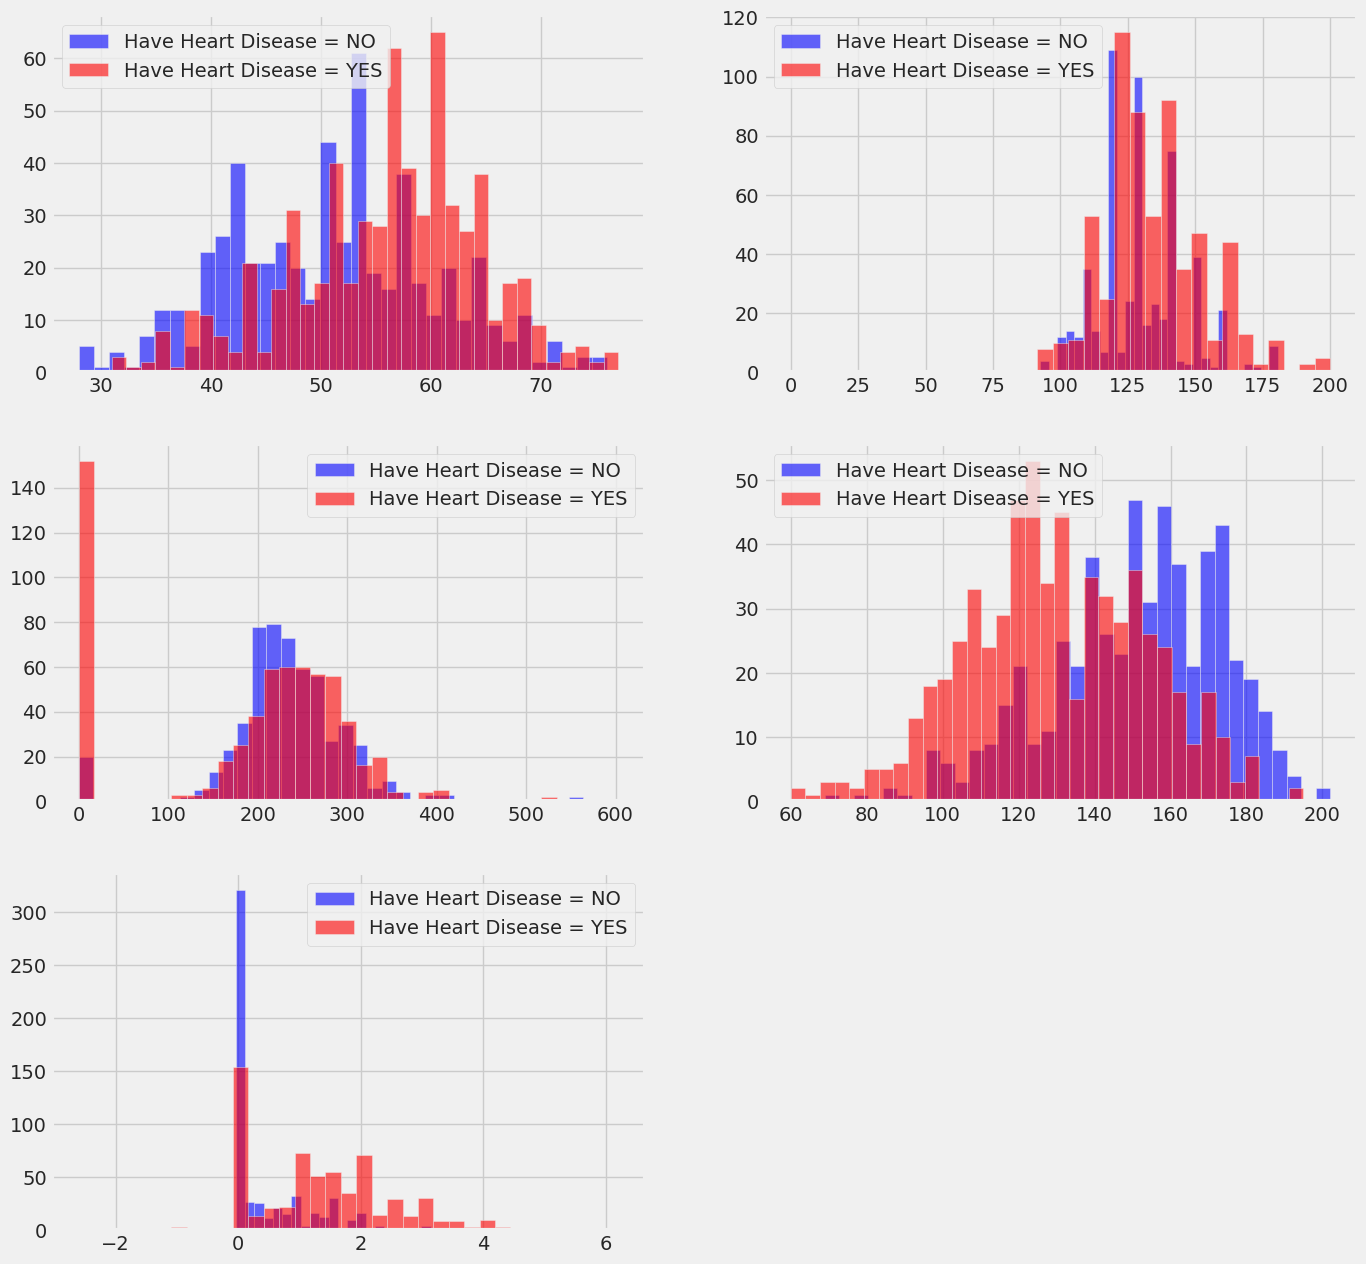

In [8]:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()


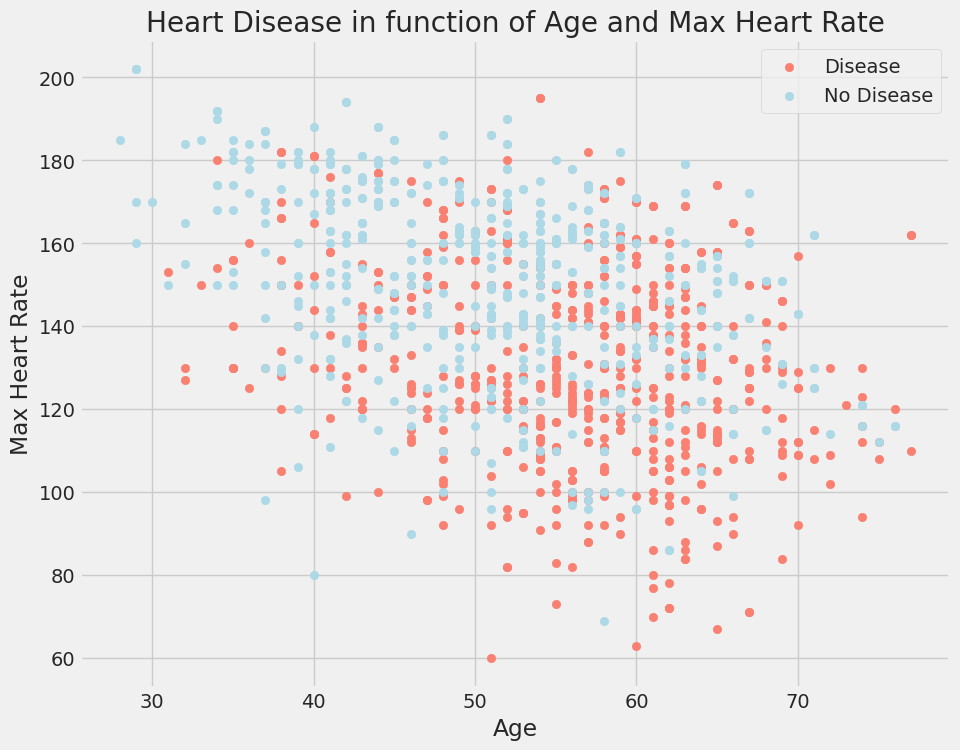

In [9]:


# Create the figure
plt.figure(figsize=(10, 8))

# Scatter plot for positive examples (target=1)
plt.scatter(df['age'][df['target'] == 1], df['max heart rate'][df['target'] == 1], c="salmon", label="Disease")

# Scatter plot for negative examples (target=0)
plt.scatter(df['age'][df['target'] == 0], df['max heart rate'][df['target'] == 0], c="lightblue", label="No Disease")

# Add informative labels and title
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend()

# Display the plot
plt.show()

(12.5, -0.5)

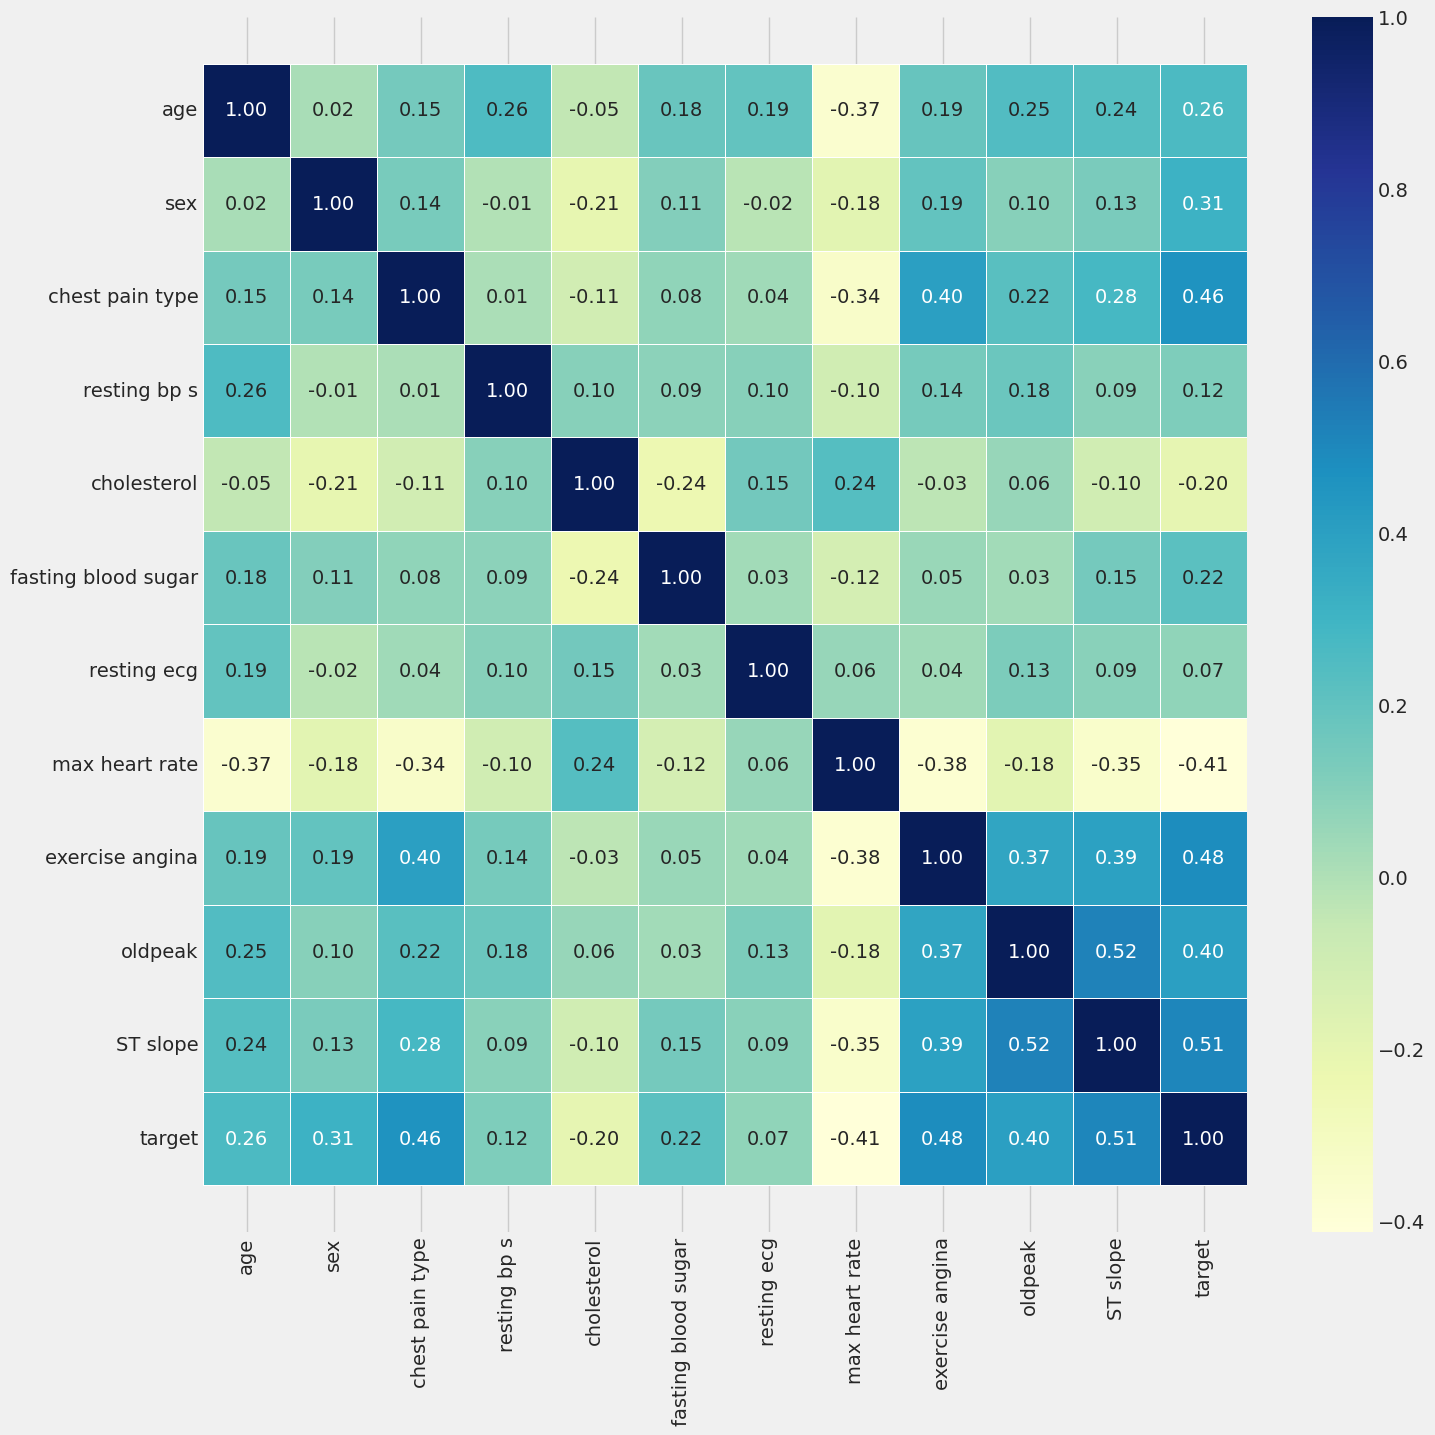

In [10]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with target'}>

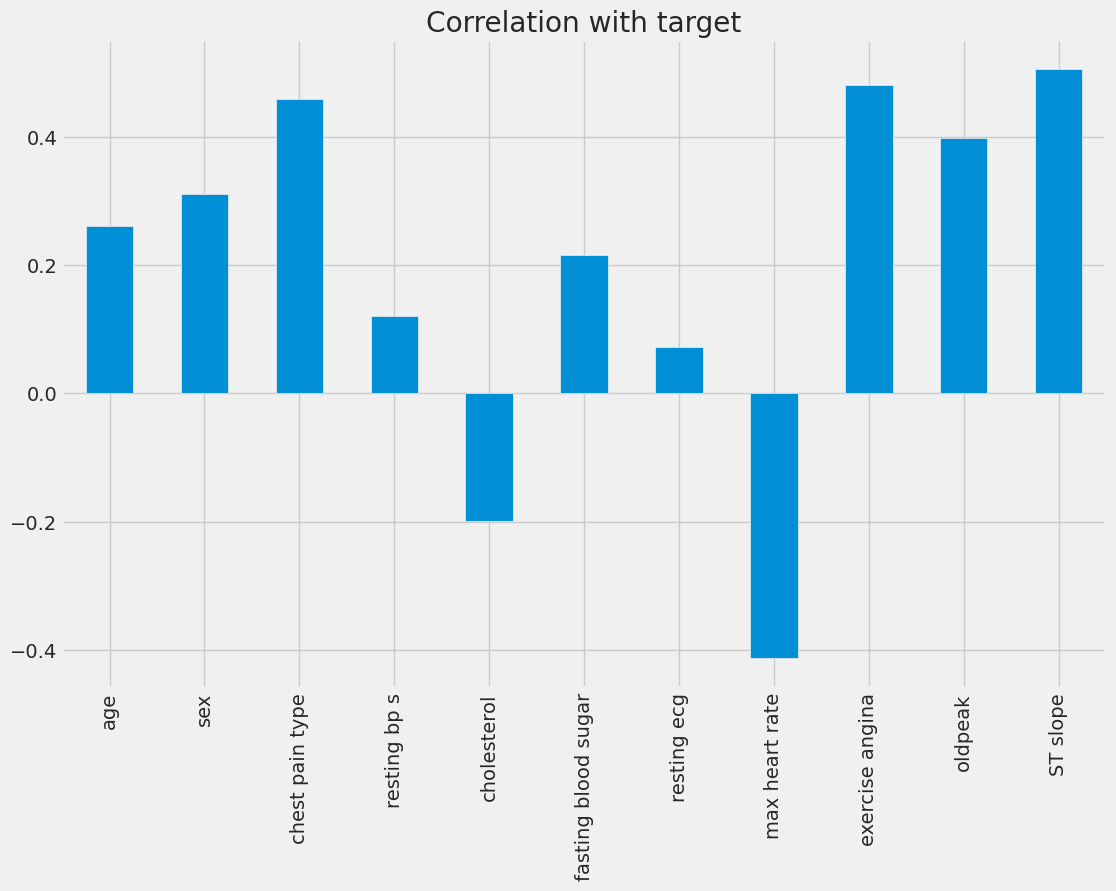

In [12]:

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8),
                                                   title="Correlation with target")

In [13]:

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [14]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [16]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.67%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.84   0.84      0.84       0.84          0.84
recall      0.83   0.85      0.84       0.84          0.84
f1-score    0.83   0.84      0.84       0.84          0.84
support   407.00 426.00      0.84     833.00        833.00
_______________________________________________
Confusion Matrix: 
 [[336  71]
 [ 65 361]]

Test Result:
Accuracy Score: 87.39%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.88      0.87       0.87          0.87
recall      0.84   0.90      0.87       0.87          0.87
f1-score    0.85   0.89      0.87       0.87          0.87
support   154.00 203.00      0.87     357.00        357.00
_______________________________________________
Confusion Matrix: 
 [[130  24]
 [ 21 182]]



In [ ]:
# Preprocess categorical and continuous features
categorical_features = [
    "sex",
    "chest pain type",
    "resting ecg",
    "exercise angina",
    "ST slope",
]
numerical_features = [
    "age",
    "resting bp s",
    "cholesterol",
    "fasting blood sugar",
    "max heart rate",
    "oldpeak",
]

df = pd.get_dummies(df, columns=categorical_features)
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split data into features (X) and target variable (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

# Evaluate model performance on training and testing sets
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
print(f"Training Accuracy: {train_score:.2f}%")
print(f"Testing Accuracy: {test_score:.2f}%")

# Function to predict heart disease for a new patient
def predict_heart_disease(age, sex, chest_pain_type, resting_bp_s, cholesterol,
                          fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina,
                          oldpeak, st_slope):
  """
  Predicts whether a new patient has heart disease based on their input features.

  Args:
      age: The patient's age.
      sex: The patient's sex (0 for female, 1 for male).
      chest_pain_type: The type of chest pain the patient experiences (categorical).
      resting_bp_s: The patient's resting blood pressure.
      cholesterol: The patient's cholesterol level.
      fasting_blood_sugar: The patient's fasting blood sugar level (0 for > 120 mg/dL, 1 for <= 120 mg/dL).
      resting_ecg: The results of the patient's resting ECG (categorical).
      max_heart_rate: The patient's maximum heart rate achieved during exercise.
      exercise_angina: Whether the patient experiences angina during exercise (0 for no, 1 for yes).
      oldpeak: The ST depression induced by exercise relative to rest (e.g., 0.0 for upsloping, 1.0 for flat, 2.0 for downsloping).
      st_slope: The slope of the ST segment (categorical).

  Returns:
      A string indicating the predicted heart disease risk ("High Risk" or "Low Risk").
  """

  # Encode categorical features using the same scheme as the training data
  new_data = pd.DataFrame({
      "sex": [sex],
      "chest pain type": [chest_pain_type],
      "resting ecg": [resting_ecg],
      "exercise angina": [exercise_angina],
      "ST slope": [st_slope],
      "age": [age],
      "resting bp s": [resting_bp_s],
      "cholesterol": [cholesterol],
      "fasting blood sugar": [fasting_blood_sugar],
      "max heart rate": [max_heart_rate],
      "oldpeak": [oldpeak],
  })
  new_data = pd.get_dummies(new_data, columns=categorical_features)

  # Scale numerical features using the same scaler as the training data
  new_data[numerical_features] = scaler.transform(new_data[numerical_features])

  # Make a prediction using the trained model
  prediction = model.predict(new_data)[0]

  # Interpret the prediction (

Training Accuracy: 83.79%
Testing Accuracy: 87.39%


In [20]:
from sklearn.metrics import accuracy_score

# Load the CSV data into a DataFrame
df = pd.read_csv("dataset.csv")

# Preprocess categorical and continuous features
categorical_features = [
    "sex",
    "chest pain type",
    "resting ecg",
    "exercise angina",
    "ST slope",
]
numerical_features = [
    "age",
    "resting bp s",
    "cholesterol",
    "fasting blood sugar",
    "max heart rate",
    "oldpeak",
]

df = pd.get_dummies(df, columns=categorical_features)
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Split data into features (X) and target variable (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

# Evaluate model performance on training and testing sets
train_score = accuracy_score(y_train, model.predict(X_train)) * 100
test_score = accuracy_score(y_test, model.predict(X_test)) * 100
print(f"Training Accuracy: {train_score:.2f}%")
print(f"Testing Accuracy: {test_score:.2f}%")

def predict_heart_disease(age, sex, chest_pain_type, resting_bp_s, cholesterol,
                          fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina,
                          oldpeak, st_slope):
  """
  Predicts whether a new patient has heart disease based on their input features.

  Args:
      ... (same as before) ...

  Returns:
      A string indicating the predicted heart disease risk ("High Risk" or "Low Risk").
  """

  # Encode categorical features using the same scheme as the training data
  new_data = pd.DataFrame({
      "sex": [sex],
      "chest pain type": [chest_pain_type],
      "resting ecg": [resting_ecg],
      "exercise angina": [exercise_angina],
      "ST slope": [st_slope],
      "age": [age],
      "resting bp s": [resting_bp_s],
      "cholesterol": [cholesterol],
      "fasting blood sugar": [fasting_blood_sugar],
      "max heart rate": [max_heart_rate],
      "oldpeak": [oldpeak],
  })

  # Handle potential missing or unknown categories
  for col in categorical_features:
      if new_data[col].isin(X_train.columns).all() == False:
          # Add missing categories to the new data
          for category in X_train.columns[X_train.columns.str.startswith(col)]:
              if category not in new_data.columns:
                  new_data[category] = 0

  new_data = pd.get_dummies(new_data, columns=categorical_features)

  # Ensure consistent column order
  missing_cols = set(X_train.columns) - set(new_data.columns)
  for col in missing_cols:
      new_data[col] = 0

  # Scale numerical features using the same scaler as the training data
  new_data[numerical_features] = scaler.transform(new_data[numerical_features])

  # Make a prediction using the trained model
  try:
      prediction = model.predict(new_data)[0]
  except ValueError as e:
      print(f"Error: {e}")
      return "Invalid input. Please check the entered values."

  # Interpret the prediction
  if prediction == 1:
      return "High Risk"
  else:
      return "Low Risk"

# ... (rest of the code) ...
age = float(input("Enter age: "))
sex = int(input("Enter sex (0 for female, 1 for male): "))
chest_pain_type = int(input("Enter chest pain type: "))
resting_bp_s = float(input("Enter resting blood pressure: "))
cholesterol = float(input("Enter cholesterol level: "))
fasting_blood_sugar = int(input("Enter fasting blood sugar (0 for >120 mg/dL, 1 for <= 120 mg/dL): "))
resting_ecg = int(input("Enter resting ECG result: "))
max_heart_rate = float(input("Enter maximum heart rate: "))
exercise_angina = int(input("Enter exercise angina (0 for no, 1 for yes): "))
oldpeak = float(input("Enter ST depression: "))
st_slope = int(input("Enter ST slope: "))

# Predict heart disease risk
predicted_risk = predict_heart_disease(age, sex, chest_pain_type, resting_bp_s, cholesterol,
                                     fasting_blood_sugar, resting_ecg, max_heart_rate, exercise_angina,
                                     oldpeak, st_slope)

# Print the predicted risk
print("Predicted Risk:", predicted_risk)

Training Accuracy: 83.79%
Testing Accuracy: 87.39%
Enter age: 12
Enter sex (0 for female, 1 for male): 


ValueError: invalid literal for int() with base 10: ''